# Imports.

In [15]:
import pandas as pd
import numpy as np
import scipy

import statsmodels.api as sm

from IPython import get_ipython
from IPython.display import Image, display

import os


from comp_econ import comp_econ as ce


# Problem 1.

## Define A and b per the Miranda and Fackler textbook.

In [16]:
A = np.matrix([
    [54, 14, -11, 2],
    [14, 50, -4, 29],
    [-11, -4, 55, 22],
    [2, 29, 22, 95]
])
print("Matrix A:")
print(A)

b = np.matrix(np.ones(shape=(A.shape[0], 1)))
print("\nVector b:")
print(b)



Matrix A:
[[ 54  14 -11   2]
 [ 14  50  -4  29]
 [-11  -4  55  22]
 [  2  29  22  95]]

Vector b:
[[1.]
 [1.]
 [1.]
 [1.]]


## 1a. Solve for x using LU Decomposition.

In [17]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html

print("Running LU Decomposition method.")
P, L, U = scipy.linalg.lu(A)
assert np.allclose(A, (P @ L @ U)), "Check LU decomposition."

# Ax = b
# A = LU, or very close to A.
# --> LUx = b
# --> x = (LU)^-1 * b
LU_inv = scipy.linalg.inv((L @ U))
x_lu = (LU_inv @ b).round(4)
print("Vector x_lu:")
print(x_lu)

Running LU Decomposition method.
Vector x_lu:
[[ 0.0189]
 [ 0.0168]
 [ 0.0234]
 [-0.0004]]


## 1b. and 1c. Solve for x using both Gauss-Jacobi and Gauss-Seidel methods.

In [18]:
print("Running Gauss-Jacobi method.")
x_gj, num_iter_gj = ce.gjacobi(A, b, np.zeros(shape=(4, 1)))
x_gj = x_gj.round(4)
print("Vector x_gj:")
print(x_gj)

print("\nRunning Gauss-Seidel method.")
x_gs, num_iter_gs = ce.gseidel(A, b, np.zeros(shape=(4, 1)))
x_gs = x_gs.round(4)
print("Vector x_gs:")
print(x_gs)

Running Gauss-Jacobi method.
Gauss-Jacobi method converged in 18 iterations.
Vector x_gj:
[[ 0.0189]
 [ 0.0168]
 [ 0.0234]
 [-0.0004]]

Running Gauss-Seidel method.
Gauss-Seidel method converged in 9 iterations.
Vector x_gs:
[[ 0.0189]
 [ 0.0168]
 [ 0.0234]
 [-0.0004]]


## Check the answers of all 3 methods.

In [19]:
# x_lu ~ x_gj and x_gj ~ x_gs --> x_lu ~ x_gs, by transitivity.
assert np.allclose(x_lu, x_gj) and np.allclose(x_gj, x_gs), "Solution vectors should all be approximately equal."

# Problem 2. The magic command %timeit includes more information than MATLAB's tic tok.

## Define A, A_inv, and b for problem 2.

In [20]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html
# https://numpy.org/doc/stable/reference/random/index.html#random-quick-start

rng = np.random.default_rng()
A = np.matrix(
    rng.standard_normal(size=(100, 100))
)
A_inv = np.linalg.inv(A)
b = np.matrix(
    rng.standard_normal(size=(100, 1))
)

# Per the question instructions, perform runs of 1, 10, and 50. By default, %timeit performs 7 runs.
runs_list = [1, 10, 50]

## 2a. x = A\b is equivelent to np.linalg.solve().

In [21]:
print("Solving for x using np.linalg.solve().")
for run_num in runs_list:
    get_ipython().run_line_magic("timeit", f"-n 1000 -r {run_num} x = np.linalg.solve(a=A, b=b)")
# Assign the result to x_solve to indicate it was found via np.linalg.solve().
x_solve = np.linalg.solve(a=A, b=b)
# Per the documention, check the solution.
assert np.allclose(np.dot(A, x_solve), b), "x_solve is not close to b."
print("Run times for x = A\\b in have been printed.")

Solving for x using np.linalg.solve().
105 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
81 μs ± 8.28 μs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)
78.4 μs ± 2.41 μs per loop (mean ± std. dev. of 50 runs, 1,000 loops each)
Run times for x = A\b in have been printed.


## 2b. PLU decomposition.

In [22]:
print("Solving for x using PLU decomposition.")
P, L, U = scipy.linalg.lu(A)
PLU_inv = scipy.linalg.inv((P @ L @ U))
for run_num in runs_list:
    get_ipython().run_line_magic("timeit", f"-n 1000 -r {run_num} x_plu = (PLU_inv @ b)")
# Assign the result to x_plu to indicate it was found via PLU decomposition.
x_plu = (PLU_inv @ b)
assert np.allclose(A, (P @ L @ U)), "Issue with PLU decomposition."
assert np.allclose(np.dot(A, x_plu), b), "x_plu is not close to b."
print("Run times for PLU decomposition have been printed.")

Solving for x using PLU decomposition.
8.23 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
6.64 μs ± 654 ns per loop (mean ± std. dev. of 10 runs, 1,000 loops each)
4.94 μs ± 556 ns per loop (mean ± std. dev. of 50 runs, 1,000 loops each)
Run times for PLU decomposition have been printed.


## 2c. x = A_inv @ b

In [23]:
print("Solving for x using A_inv @ b.")
for run_num in runs_list:
    get_ipython().run_line_magic("timeit", f"-n 1000 -r {run_num} x_ainv = A_inv @ b")
# Assign the result to x_ainv to indicate it was found via A_inv @ b.
x_ainv = A_inv @ b
assert np.allclose(np.dot(A, x_ainv), b), "x_ainv is not close to b."
print("Run times for A_inv @ b have been printed.")

Solving for x using A_inv @ b.
6.04 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
5.57 μs ± 788 ns per loop (mean ± std. dev. of 10 runs, 1,000 loops each)
4.86 μs ± 461 ns per loop (mean ± std. dev. of 50 runs, 1,000 loops each)
Run times for A_inv @ b have been printed.


## Check the answers of all 3 methods.

In [24]:
assert np.allclose(x_solve, x_plu) and np.allclose(x_plu, x_ainv), "Solution vectors should all be approximately equal."

# Problem 3.

## 3a. Looking at the demand equation, the parameter of interest is b since it is multiplied by the log of the price p. 

## 3b. Load image of written math.

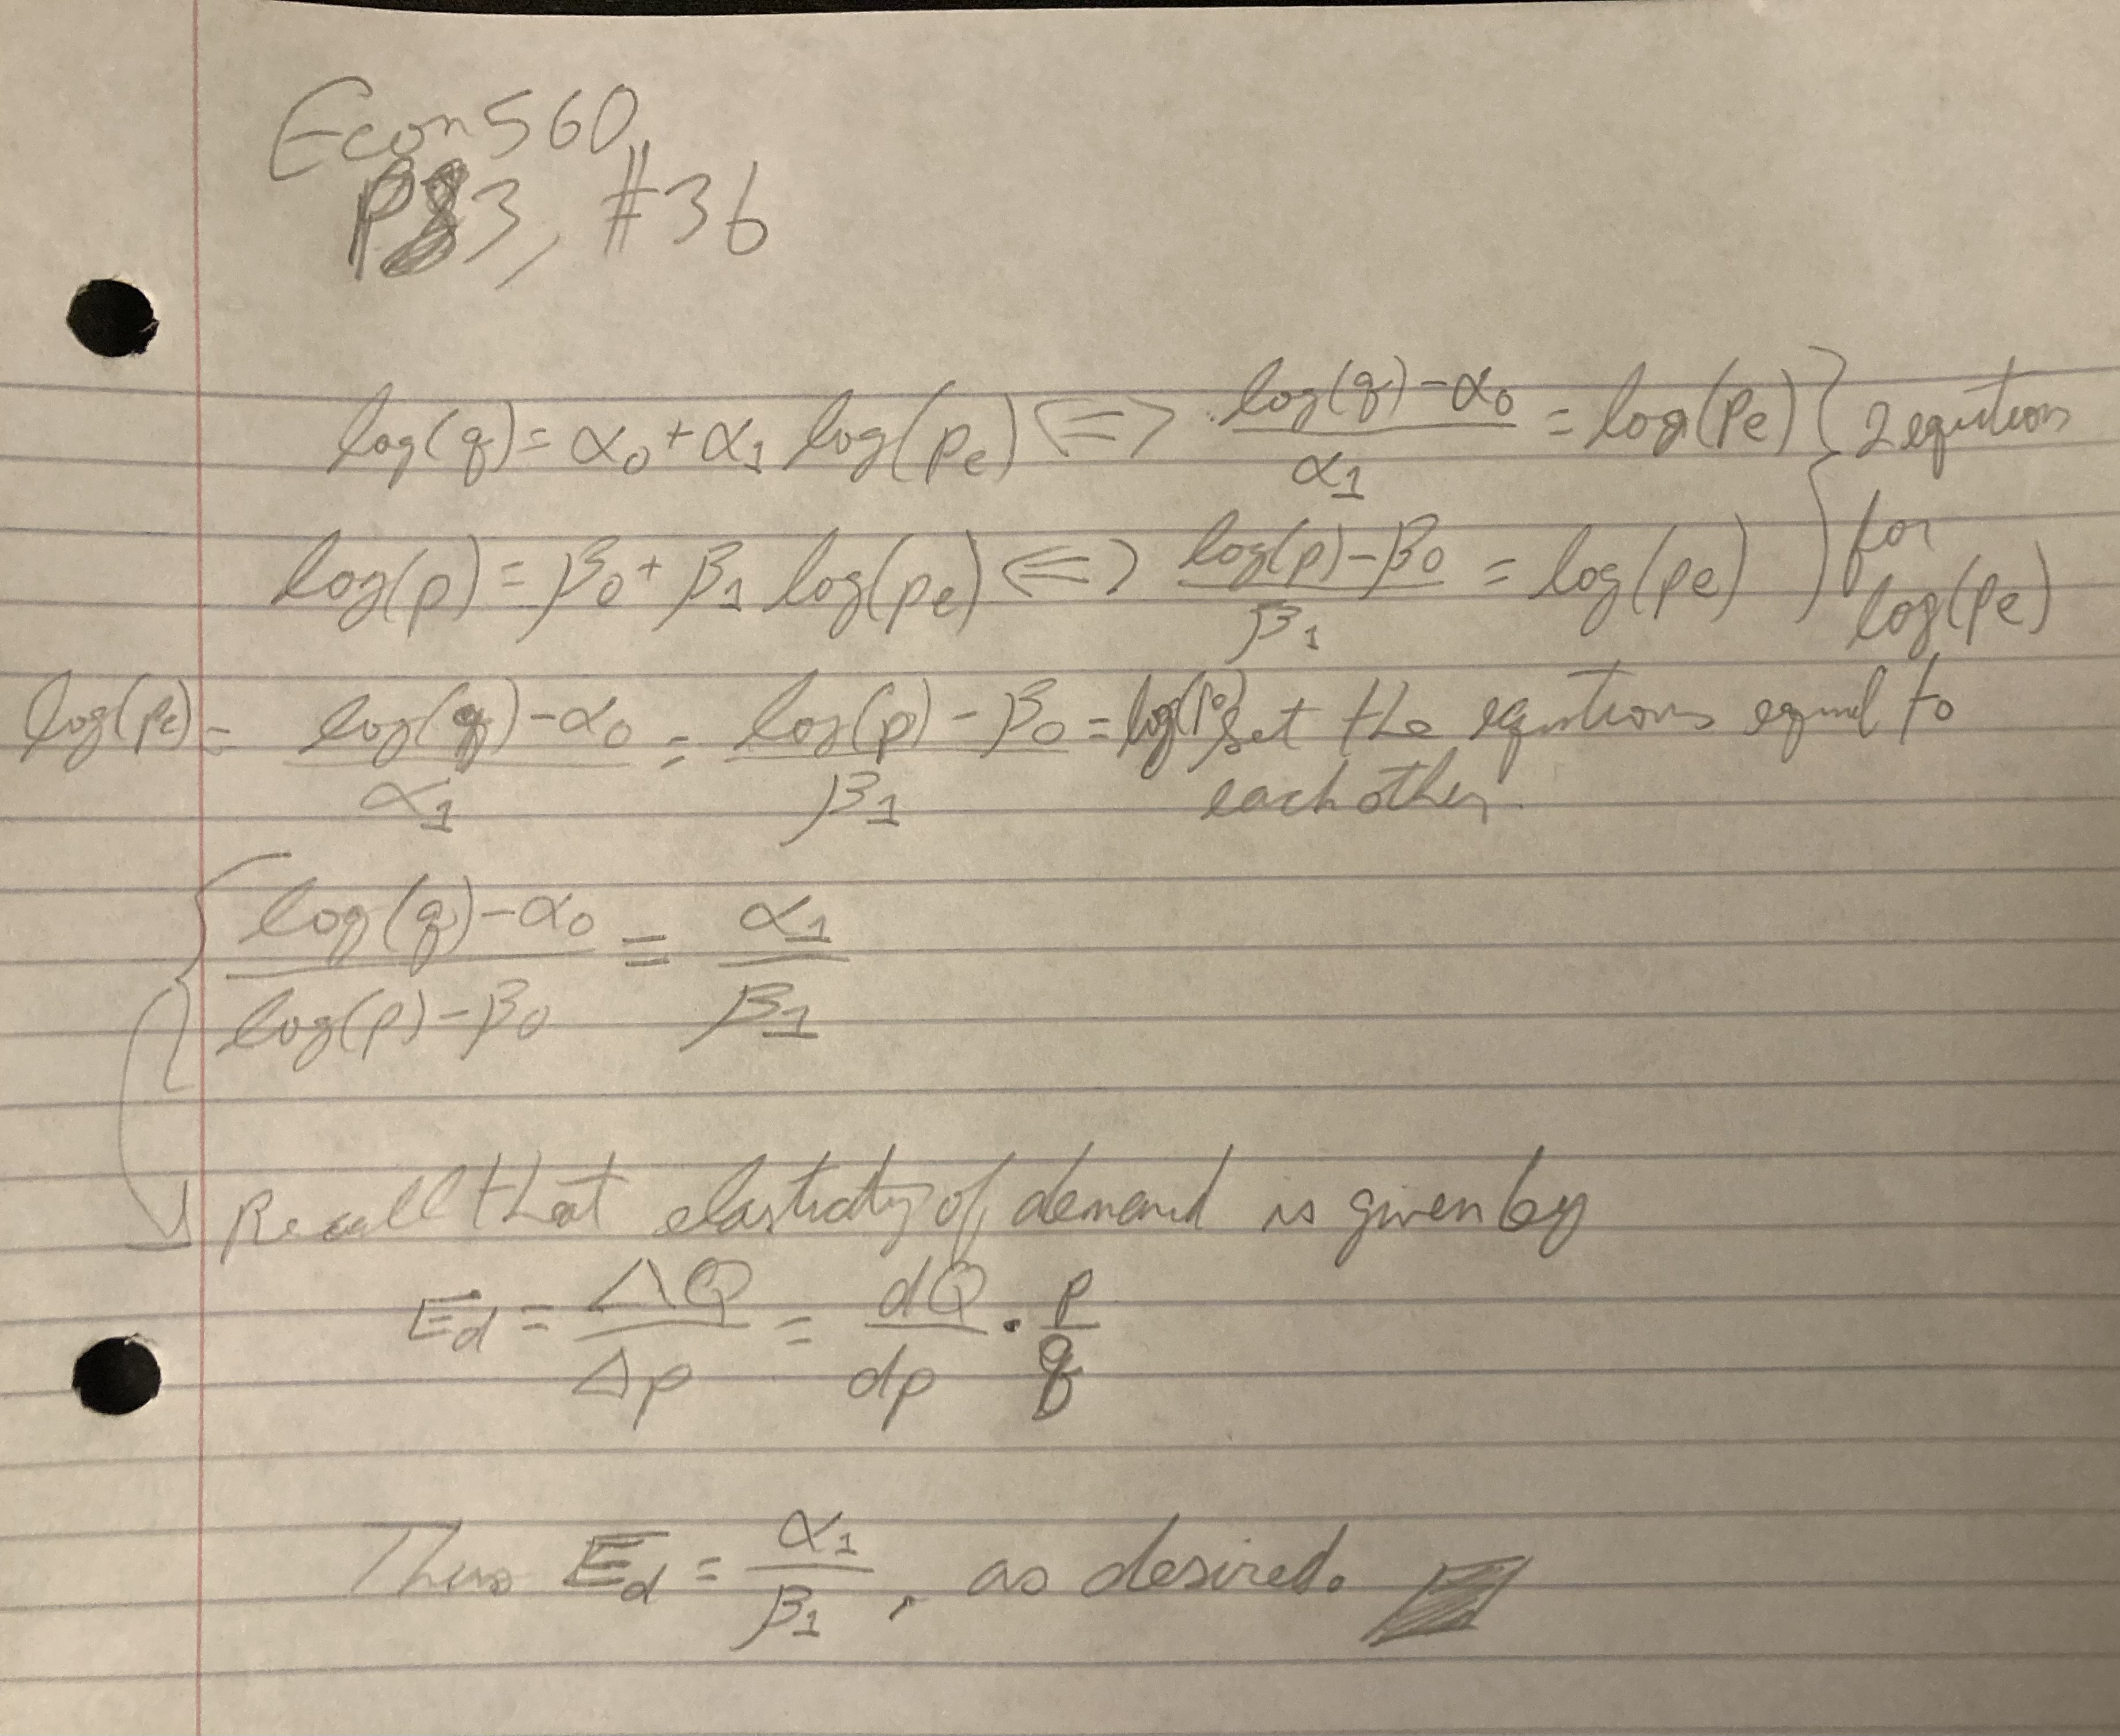

In [25]:
image_dir = os.getenv("ECON_560_IMAGE_DIR")
display(Image(rf'{image_dir}\\econ_560_ps3_3b.jpg'))

## 3c.

### Load the MATLAB file.

In [26]:
matlab_files_dir = os.getenv("ECON_560_MAT_FILES_DIR")
ps3_data_dict = scipy.io.loadmat(rf'{matlab_files_dir}\\ps3_data.mat')
print(ps3_data_dict.keys())

df_ps3 = pd.DataFrame({k: np.squeeze(ps3_data_dict[k]) for k in ps3_data_dict if not "__" in k})
# We are told all columns have been logged.
df_ps3 = df_ps3.add_prefix('log_')
print("df_ps3 info:")
print(df_ps3.info())
print(f'df_ps3 shape: {df_ps3.shape}')

dict_keys(['__header__', '__version__', '__globals__', 'elecp', 'pcars', 'q'])
df_ps3 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   log_elecp  205 non-null    float64
 1   log_pcars  205 non-null    float64
 2   log_q      205 non-null    float64
dtypes: float64(3)
memory usage: 4.9 KB
None
df_ps3 shape: (205, 3)


### We are told to "estimate the demand elasticity," so let's use OLS to obtain 2 models, similar to the 2 equations in 3b.

In [27]:
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
# Y_i = (X_i * B_i) + e_i

#### Model log(q), the log of the quantity. ####
# Following log(q) = alpha_0 + alpha_1 * log(p_e) as in 3b.
print("Using OLS to model log of quanities.")
Y_log_q = df_ps3['log_q']
X_log_elecp = df_ps3['log_elecp']
X_log_elecp = sm.add_constant(X_log_elecp)
log_q_model = sm.OLS(Y_log_q, X_log_elecp)
log_q_results = log_q_model.fit()
print(log_q_results.params)
####

print()

#### Model log(p), the log of the cars prices. ####
# Following log(p) = beta_0 + beta_1 * log(p_e) as in 3b.
print("Using OLS to model log of car prices.")
Y_log_p = df_ps3['log_pcars']
log_p_model = sm.OLS(Y_log_p, X_log_elecp)
log_p_results = log_p_model.fit()
print(log_p_results.params)

Using OLS to model log of quanities.
const       -1.290743e-16
log_elecp   -3.720577e-01
dtype: float64

Using OLS to model log of car prices.
const        9.405454e-17
log_elecp    2.202723e-01
dtype: float64


### Assign coefficients, then calculate the estimated elasticity of demand using the formula in 3b., (alpha_1 / beta_1).

In [28]:
# In the assignment, the alphas are associated with log(q), and the betas are associated with log(p).

alpha_0 = log_q_results.params.iloc[0]
alpha_1 = log_q_results.params.iloc[1]

beta_0 = log_p_results.params.iloc[0]
beta_1 = log_p_results.params.iloc[1]

esti_elast_demand = np.round((alpha_1 / beta_1), 4)
print(f"The estimated elasticity of demand is {esti_elast_demand}.")

The estimated elasticity of demand is -1.6891.


# 3d. The short answer is no, because the new function represents a shift to the right in the demand curve.<br><p style="font-size:25px;">Recall the demand equation Q = a - bP. Considering the new function log(q) = a - b * log(p_cars) - f * log(p_elec) where f > 0, we get a new demand function.<br>Q = a - bP - f * log(p_elec)<br>Q = a_elec - bP, where a_elec = a - f * log(p_elec) > 0<br>Thus the demand curve shifts to the right, and the new model is different from what we modelled earlier in this question.</p>